In [14]:
#Load Data function

def LoadDataFromL01():
    import pickle
    filename = "..\Filer\Data\itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

#Plot models function
def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    print(f"{name_model1}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2}.score(X, y)={score_model2:0.2f}")

# Qa)

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X,y = LoadDataFromL01()
#Scale data
X_min = np.min(X)
X_max = np.max(X)
s = X_max - X_min
X_scaled = (X-X_min)/s
# Setup MLPRegressor
mlp_scaled = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
mlp_regular = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

mlp_scaled.fit(X_scaled,y)
mlp_regular.fit(X,y)

linreg_regular = LinearRegression()
linreg_scaled = LinearRegression()

linreg_regular.fit(X, y)
linreg_scaled.fit(X_scaled, y)

# TODO: Explain the fundamental problem with a min-max scaler and outliers.
# Will a sklearn.preprocessing.StandardScaler do better here,
# in the case of abnormal feature values/outliers?

LinearRegression()

lin.reg.score(X, y)=0.73
MLP Scaled X.score(X, y)=0.73


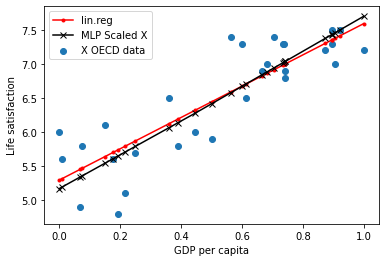

In [42]:
PlotModels(linreg_scaled, mlp_scaled, X_scaled, y, name_model2="MLP Scaled X")

lin.reg.score(X, y)=0.73
MLP Regular X.score(X, y)=-91822.98


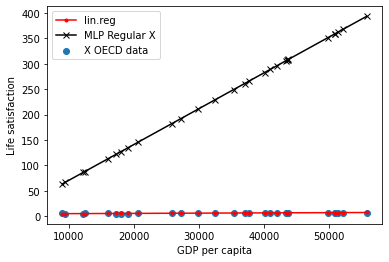

In [49]:
PlotModels(linreg_regular, mlp_regular, X, y, name_model2="MLP Regular X")


# Qb)

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled_min_max = scaler.transform(X)
if X_scaled == X_scaled_min_max: #TODO: Fix
    print("Vectors are equal")
mlp = MLPRegressor(hidden_layer_sizes=(1000, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe.fit(X,y)

PlotModels(linreg_regular, pipe, X, y, name_model2="Pipe")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Qc)
## TODO

# Qd)

lin.reg.score(X, y)=0.73
Pipe.score(X, y)=0.72


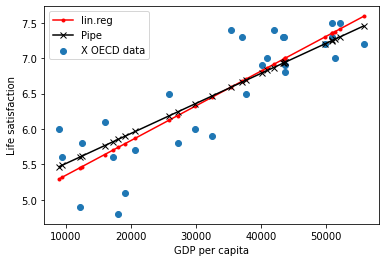

In [59]:
# 1 hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(1,),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe.fit(X,y)

PlotModels(linreg_regular, pipe, X, y, name_model2="Pipe")


lin.reg.score(X, y)=0.73
Pipe.score(X, y)=0.72


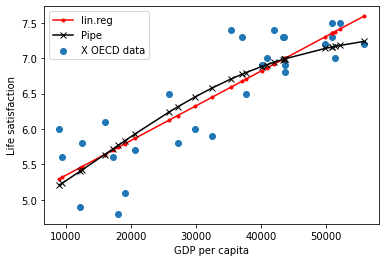

In [62]:
# 1 hidden layer, sigmoid
mlp = MLPRegressor(hidden_layer_sizes=(1,),
                   solver='adam',
                   activation='logistic',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe.fit(X,y)

PlotModels(linreg_regular, pipe, X, y, name_model2="Pipe")


lin.reg.score(X, y)=0.73
Pipe.score(X, y)=0.81


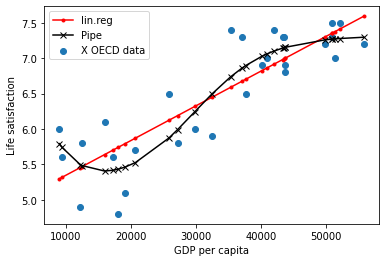

In [70]:
# 2 hidden layer, sigmoid, lbfgs solver
#lbfgs converges faster ?
mlp = MLPRegressor(hidden_layer_sizes=(2,),
                   solver='lbfgs',
                   activation='logistic',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe.fit(X,y)

PlotModels(linreg_regular, pipe, X, y, name_model2="Pipe")